In [1]:
import ember
import pandas as pd
import numpy as np
import json
import datetime

import matplotlib.pyplot as plt
from ember.features import PEFeatureExtractor

In [3]:
%%time
ember.create_vectorized_features("ember2018/")

Vectorizing training set


100%|███████████████████████████████████████████████████████████████| 800000/800000 [02:05<00:00, 6353.80it/s]


Vectorizing test set


100%|███████████████████████████████████████████████████████████████| 200000/200000 [00:31<00:00, 6333.02it/s]

CPU times: user 1min 41s, sys: 33.4 s, total: 2min 14s
Wall time: 2min 40s


In [5]:
%%time
metadata = ember.create_metadata("ember2018/")

CPU times: user 51.9 s, sys: 29.7 s, total: 1min 21s
Wall time: 59 s


In [185]:
train_data = metadata.loc[metadata['subset'] == 'train'][['appeared', 'label']]
test_data = metadata.loc[metadata['subset'] == 'test'][['appeared', 'label']]

In [186]:
train_data = train_data.merge(pd.to_datetime(train_data['appeared']), 'left', right_index=True, left_index=True, suffixes=('', '_tz'))
train_data.head()

,appeared,label,appeared_tz
0,2006-12,0,2006-12-01
1,2007-01,0,2007-01-01
2,2007-02,0,2007-02-01
3,2007-02,0,2007-02-01
4,2007-02,0,2007-02-01


In [187]:
train_data.loc[train_data['appeared_tz'] < datetime.datetime(month=1, day=1, year=2017), "appeared"] = '<2017'

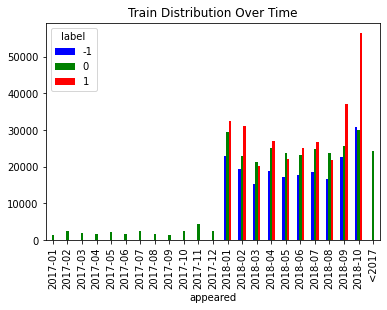

In [188]:
x = train_data.groupby(['appeared', 'label']).count()
ax1 = x.reset_index().pivot(index='appeared', columns='label', values='appeared_tz').plot.bar(color={
    0:'green', 1: 'red', -1: 'blue'
})
ax1.set_title("Train Distribution Over Time")
fig = ax1.get_figure()
fig.savefig('train_distribution_over_time.jpg', bbox_inches="tight")

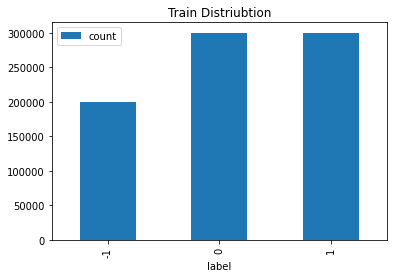

In [189]:
ax2 = train_data.groupby('label').count().drop(columns=['appeared_tz']).rename(columns={'appeared': 'count'}).plot.bar()
ax2.set_title("Train Distriubtion")
fig = ax2.get_figure()
fig.savefig('train_distribution.jpg', bbox_inches="tight")

In [168]:
ax1

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [190]:
test_data = test_data.merge(pd.to_datetime(test_data['appeared']), 'left', right_index=True, left_index=True, suffixes=('', '_tz'))
test_data.loc[test_data['appeared_tz'] < datetime.datetime(month=1, day=1, year=2017), "appeared"] = '<2017'

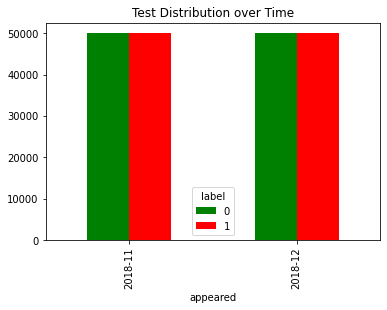

In [191]:
x = test_data.groupby(['appeared', 'label']).count()
ax = x.reset_index().pivot(index='appeared', columns='label', values='appeared_tz').plot.bar(color={
    0:'green', 1: 'red', -1: 'blue'
})
ax.set_title("Test Distribution over Time")
fig = ax.get_figure()
fig.savefig('test_distribution_over_time.jpg', bbox_inches="tight")

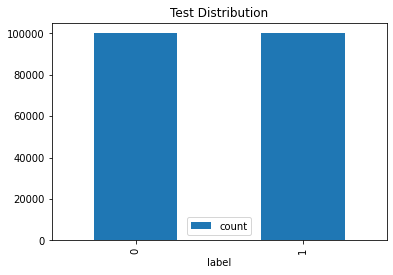

In [192]:
ax = test_data.groupby('label').count().drop(columns=['appeared_tz']).rename(columns={'appeared': 'count'}).plot.bar()
ax.set_title("Test Distribution")
fig = ax.get_figure()
fig.savefig('test_distribution.jpg', bbox_inches="tight")

In [8]:
X_train, y_train, X_test, y_test = ember.read_vectorized_features("ember2018/")

In [46]:
X_train.shape

(800000, 2381)

In [30]:
for i, item in enumerate(X_train[0]):
    if item == 5.972072:
        print(i)

In [143]:
raw_features = pd.read_json('ember2018/train_features_0.jsonl', lines=True)
raw_features.head()['histogram', 'byteentropy', 'strings', 'general', 'header', 'section', 'imports', 'exports', 'datadirectories']

KeyError: ('histogram', 'byteentropy', 'strings', 'general', 'header', 'section', 'imports', 'exports', 'datadirectories')

In [144]:
raw_features.head()[['histogram', 'byteentropy', 'strings', 'general', 'header', 'section', 'imports', 'exports', 'datadirectories']]

,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1238, 'avlength': 12.0201938610...","{'size': 180224, 'vsize': 180224, 'has_debug':...","{'coff': {'timestamp': 892092777, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
3,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 11166, 'avlength': 5.8078989790...","{'size': 2377730, 'vsize': 77824, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Wr...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
4,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 5547, 'avlength': 6.04344690823...","{'size': 1153808, 'vsize': 1167360, 'has_debug...","{'coff': {'timestamp': 938258311, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegCloseKey', 'AllocateAndI...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [18]:
sample = raw_features.loc[0]
sample

sha256             0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...
md5                                 63956d6417f8f43357d9a8e79e52257e
appeared                                                     2006-12
label                                                              0
avclass                                                             
histogram          [45521, 13095, 12167, 12496, 12429, 11709, 118...
byteentropy        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
strings            {'numstrings': 14573, 'avlength': 5.9720716393...
general            {'size': 3101705, 'vsize': 380928, 'has_debug'...
header             {'coff': {'timestamp': 1124149349, 'machine': ...
section            {'entry': '.text', 'sections': [{'name': '.tex...
imports            {'KERNEL32.dll': ['SetFileTime', 'CompareFileT...
exports                                                           []
datadirectories    [{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...
Name: 0, dtype: object

In [37]:
def process_raw_features(raw_obj):
    sections = raw_obj['sections']
    general = [
        len(sections),  # total number of sections
        # number of sections with nonzero size
        sum(1 for s in sections if s['size'] == 0),
        # number of sections with an empty name
        sum(1 for s in sections if s['name'] == ""),
        # number of RX
        sum(1 for s in sections if 'MEM_READ' in s['props'] and 'MEM_EXECUTE' in s['props']),
        # number of W
        sum(1 for s in sections if 'MEM_WRITE' in s['props'])
    ]
    # gross characteristics of each section
    section_sizes = [(s['name'], s['size']) for s in sections]
    section_sizes_hashed = FeatureHasher(50, input_type="pair").transform([section_sizes]).toarray()[0]
    section_entropy = [(s['name'], s['entropy']) for s in sections]
    section_entropy_hashed = FeatureHasher(50, input_type="pair").transform([section_entropy]).toarray()[0]
    section_vsize = [(s['name'], s['vsize']) for s in sections]
    section_vsize_hashed = FeatureHasher(50, input_type="pair").transform([section_vsize]).toarray()[0]
    entry_name_hashed = FeatureHasher(50, input_type="string").transform([raw_obj['entry']]).toarray()[0]
    characteristics = [p for s in sections for p in s['props'] if s['name'] == raw_obj['entry']]
    characteristics_hashed = FeatureHasher(50, input_type="string").transform([characteristics]).toarray()[0]

    return np.hstack([
        general, section_sizes_hashed, section_entropy_hashed, section_vsize_hashed, entry_name_hashed,
        characteristics_hashed
    ]).astype(np.float32)

In [40]:
section_feats = raw_features['section'].apply(process_raw_features)

In [45]:
section_feats['section'][0]

array([ 5.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
        2.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  6.6560000e+03,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -5.1200000e+02,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -2.6624000e+04,  0.0000000e+00,
        2.7648000e+04,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [44]:
header=['total_sections', 'sections_with_zero', 'sections_with_no_name', 'total_rx', 'total_w', 
        'section_sizes_hashed', 'section_entropy_hashed', 'section_vsize_hashed', 'entry_name_hashed',
        'characteristics_hashed']
pd.DataFrame(data=section_feats['section'].values, columns=header)

ValueError: Shape of passed values is (50000, 1), indices imply (50000, 10)

In [ ]:
raw_features.merge(pd.json_normalize(raw_features['strings']), 'left', left_index=True, right_index=True)
raw_features.merge(pd.json_normalize(raw_features['general']), 'left', left_index=True, right_index=True)
raw_features.merge(pd.json_normalize(raw_features['header']), 'left', left_index=True, right_index=True)

In [141]:
raw_features.head()

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1238, 'avlength': 12.0201938610...","{'size': 180224, 'vsize': 180224, 'has_debug':...","{'coff': {'timestamp': 892092777, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 11166, 'avlength': 5.8078989790...","{'size': 2377730, 'vsize': 77824, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Wr...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 5547, 'avlength': 6.04344690823...","{'size': 1153808, 'vsize': 1167360, 'has_debug...","{'coff': {'timestamp': 938258311, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegCloseKey', 'AllocateAndI...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
